In [1]:
# !pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [3]:
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
breast_cancer_wisconsin_original.metadata

{'uci_id': 15,
 'name': 'Breast Cancer Wisconsin (Original)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original',
 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv',
 'abstract': 'Original Wisconsin Breast Cancer Database',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 699,
 'num_features': 9,
 'feature_types': ['Integer'],
 'demographics': [],
 'target_col': ['Class'],
 'index_col': ['Sample_code_number'],
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1990,
 'last_updated': 'Sun Mar 10 2024',
 'dataset_doi': '10.24432/C5HP4Z',
 'creators': ['WIlliam Wolberg'],
 'intro_paper': None,
 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, ha

In [4]:
breast_cancer_wisconsin_original.variables 

,name,role,type,demographic,description,units,missing_values
0,Sample_code_number,ID,Categorical,None,None,None,no
1,Clump_thickness,Feature,Integer,None,None,None,no
2,Uniformity_of_cell_size,Feature,Integer,None,None,None,no
3,Uniformity_of_cell_shape,Feature,Integer,None,None,None,no
4,Marginal_adhesion,Feature,Integer,None,None,None,no
5,Single_epithelial_cell_size,Feature,Integer,None,None,None,no
6,Bare_nuclei,Feature,Integer,None,None,None,yes
7,Bland_chromatin,Feature,Integer,None,None,None,no
8,Normal_nucleoli,Feature,Integer,None,None,None,no
9,Mitoses,Feature,Integer,None,None,None,no


In [5]:
# Data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets

X.tail()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1
698,4,8,8,5,4,5.0,10,4,1


In [6]:
y.tail()

,Class
694,2
695,2
696,4
697,4
698,4


### Explicação das Colunas do Dataset

O dataset contém características extraídas de imagens digitalizadas de biópsias de mama. Cada linha representa uma amostra e cada coluna representa uma característica analisada microscopicamente. As explicações de cada coluna são:

1. **Espessura_do_aglomerado (Clump_thickness):**
   - Mede a espessura dos aglomerados celulares. Valores maiores podem indicar a presença de células cancerígenas, que geralmente se agrupam de forma densa.

2. **Uniformidade_tamanho_celular (Uniformity_of_cell_size):**
   - Avalia a consistência do tamanho das células. Maior variabilidade pode indicar malignidade.

3. **Uniformidade_forma_celular (Uniformity_of_cell_shape):**
   - Analisa a uniformidade das formas celulares. Células cancerígenas apresentam formas mais irregulares.

4. **Adesao_marginal (Marginal_adhesion):**
   - Mede a força de adesão entre células. Células normais aderem melhor umas às outras do que as malignas.

5. **Tamanho_celular_epitelial_unica (Single_epithelial_cell_size):**
   - Avalia o tamanho de células epiteliais individuais. Células maiores podem estar associadas a câncer.

6. **Nucleos_nus (Bare_nuclei):**
   - Contagem de núcleos sem citoplasma visível. Este é um indicador importante de malignidade.

7. **Cromatina_suave (Bland_chromatin):**
   - Mede a textura da cromatina (material genético no núcleo). A textura suave é típica de células normais.

8. **Nucleolos_normais (Normal_nucleoli):**
   - Quantifica o número de nucléolos (estruturas no núcleo). Números elevados podem estar associados a câncer.

9. **Mitose (Mitoses):**
   - Mede a taxa de divisão celular. Taxas altas são um indicador claro de malignidade.

10. **Classe_Binaria:**
    - Classe alvo do problema, representando:
      - `0`: Tumor benigno.
      - `1`: Tumor maligno.


### Distribuição do dataset

In [7]:
# Combinar X e y em um único DataFrame
full_dataset = X.copy()  # Criar uma cópia do DataFrame X
full_dataset['Class'] = y  # Adicionar a coluna 'Class' de y

full_dataset.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,699.0,4.418,2.816,1.0,2.0,4.0,6.0,10.0
Uniformity_of_cell_size,699.0,3.134,3.051,1.0,1.0,1.0,5.0,10.0
Uniformity_of_cell_shape,699.0,3.207,2.972,1.0,1.0,1.0,5.0,10.0
Marginal_adhesion,699.0,2.807,2.855,1.0,1.0,1.0,4.0,10.0
Single_epithelial_cell_size,699.0,3.216,2.214,1.0,2.0,2.0,4.0,10.0
Bare_nuclei,683.0,3.545,3.644,1.0,1.0,1.0,6.0,10.0
Bland_chromatin,699.0,3.438,2.438,1.0,2.0,3.0,5.0,10.0
Normal_nucleoli,699.0,2.867,3.054,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589,1.715,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.690,0.951,2.0,2.0,2.0,4.0,4.0


O dataset aparenta estar bem distribuido

In [8]:
class_counts = y.value_counts()
class_counts

Class
2        458
4        241
Name: count, dtype: int64

Já que temos apenas 2 classes, vamos transforma-la em binária.

In [9]:
y = y.replace({2: 0, 4: 1})
class_counts = y.value_counts()
class_counts

Class
0        458
1        241
Name: count, dtype: int64

### Valores nulos:

In [10]:
X.isna().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

Since we have 16 missing values on Bare_nuclei, we will handle that.

In [11]:
X[X['Bare_nuclei'].isna()]

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
23,8,4,5,1,2,NaN,7,3,1
40,6,6,6,9,6,NaN,7,8,1
139,1,1,1,1,1,NaN,2,1,1
145,1,1,3,1,2,NaN,2,1,1
158,1,1,2,1,3,NaN,1,1,1
164,5,1,1,1,2,NaN,3,1,1
235,3,1,4,1,2,NaN,3,1,1
249,3,1,1,1,2,NaN,3,1,1
275,3,1,3,1,2,NaN,2,1,1
292,8,8,8,1,2,NaN,6,10,1


## Visualizações dos dados

In [12]:
# Palete de cores personalizadas para 'não benigno' (cinza) e 'benigno 1' (vermelho)
custom_palette = {0: 'gray', 1: 'darkred'}

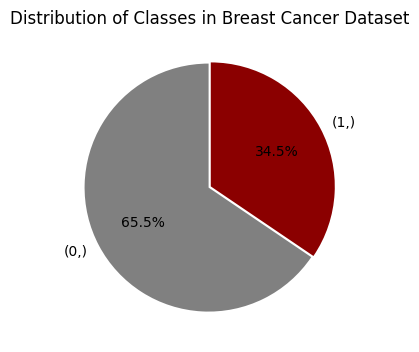

In [13]:
plt.figure(figsize=(4, 5))
class_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=[custom_palette.get(0), custom_palette.get(1)],
    labels=class_counts.index,
    explode=(0.01, 0.01)  # Separando a primeira fatia
)

plt.title('Distribution of Classes in Breast Cancer Dataset')
plt.ylabel('')  # Remove o label do eixo Y
plt.show()

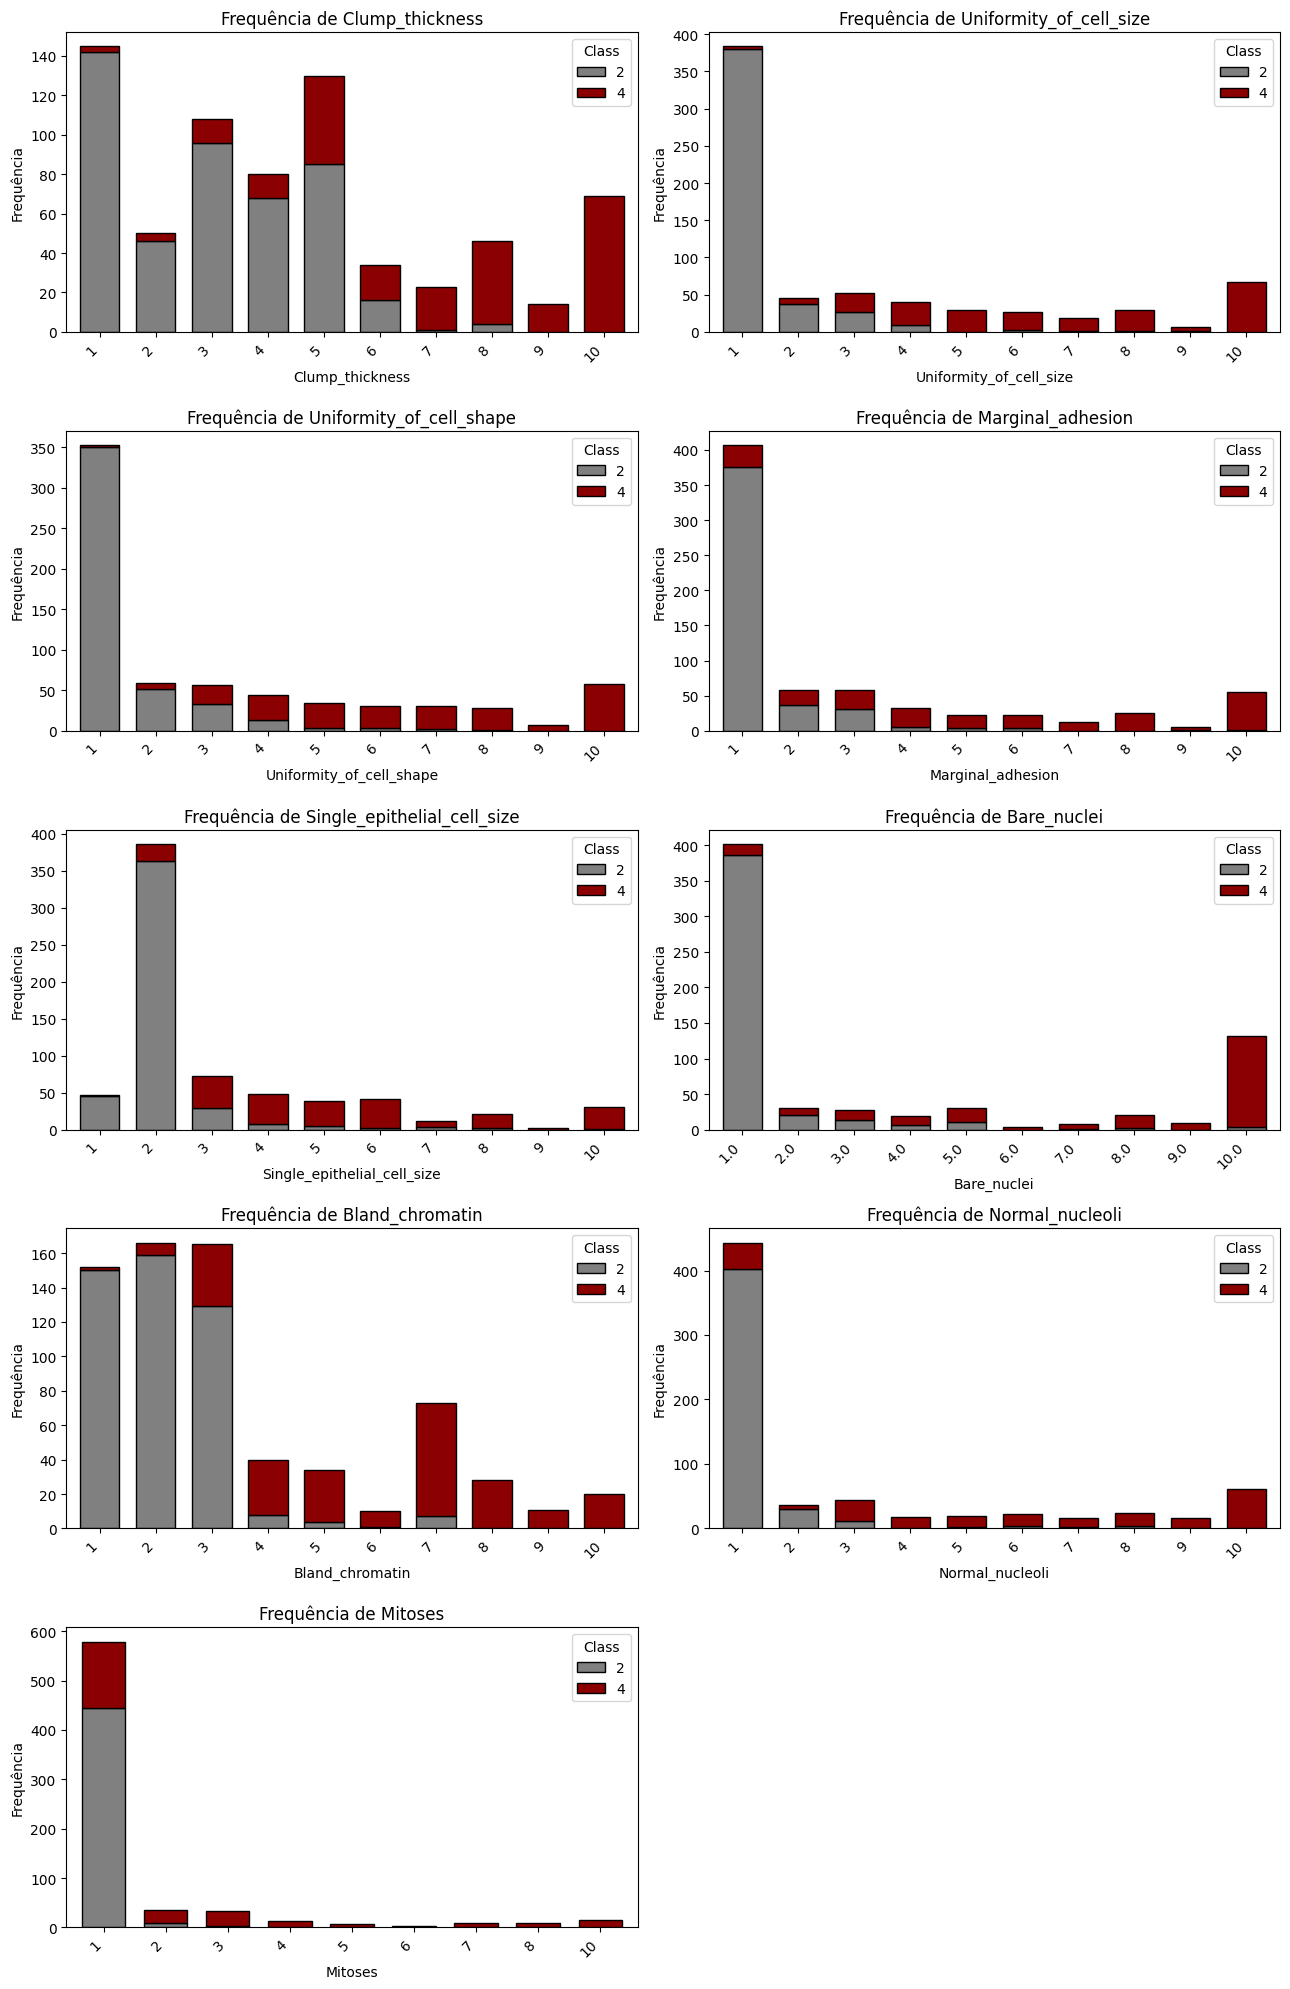

In [14]:
# Número de colunas e linhas para os subplots
num_columns = len(X.columns)
num_rows = (num_columns + 1) // 2
plt.figure(figsize=(13, 4 * num_rows))

# Plotar cada atributo em gráficos de barras empilhadas
for i, column in enumerate(X.columns, 1):
    plt.subplot(num_rows, 2, i)
    
    # Contagem das ocorrências de cada classe para cada valor da coluna
    count_data = full_dataset.groupby([column, 'Class']).size().unstack(fill_value=0)
    
    # Plotando barras empilhadas
    count_data.plot(kind='bar', stacked=True, color=[custom_palette[0], custom_palette[1]], 
                    ax=plt.gca(), width=0.7, edgecolor='black')  # Ajuste de largura e contorno preto
    
    plt.title(f'Frequência de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()
